<a href="https://colab.research.google.com/github/Hyelimee/1day1code_basic/blob/main/1_Dicom_load_meta_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dicom 이미지 불러와서 읽기
- pneumothorax(기흉) 이미지 읽기
- brain tumor image 읽고 gif로 보기


In [2]:
#pydicom 설치하기
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.2 MB/s eta 0:00:00


In [3]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from pydicom.data import get_testdata_file
import logging
import sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
BASE_PATH = '/content/drive/MyDrive/CH01, 03 실습.zip (Unzipped Files)/CH01_실습/Fastcampus/dicom_sample/pneumothorax/dicom-images-test'
SAMPLE_IMAGE_PATH = list(Path(BASE_PATH).glob('*'))
dicom_img_list = [list(i.glob('*/*.dcm'))[0] for i in SAMPLE_IMAGE_PATH]

In [5]:
#meta data 읽어오기
number_img = 0
dcm_img = pydicom.dcmread(dicom_img_list[number_img], force=True)

In [6]:
dcm_img

#JPEG baseline = JPEG으로 압축했던 이미지라는 것을 알 수 있음
#SOP Instance UID = unique identifier로써 slice number와 같이 포함되어있음
#content data = pixel data가 만들어진 시간
#slice thickness = 이미지의 실제 pixel과 pixel 사이의 깊이
#instance number = 이미지 장수를 의미 , slice number
#study date = 찍은 날짜
#modality
#Body Part Examined = 찍은 부위
#Patient's sex, age = 환자 정보
#row, column = x, y 가로세로 해상도
#비어있는 데이터의 경우 캐글같은 오픈소스데이터에 올릴때 익명화를 위해 마스킹 한 것

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 200
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.697.1517875164.115252
(0002,0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.697.1517875164.115252
(0008,0020) Study Date                          DA: '19010101'
(0008,0030) Study Time                      

In [7]:
#이미지 읽어오기 함수
def show_dcm_info(dataset):
    print("Filename.......:", dicom_img_list[number_img])
    print("Storage type...:", dataset.SOPClassUID)
    print()

    pat_name = dataset.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name.........:", display_name)
    print("Patient id.............:", dataset.get("PatientID"))
    print("Patient's Age..........:", dataset.get("PatientAge"))
    print("Patient's Sex..........:", dataset.get("PatientSex"))
    print("Modality...............:", dataset.get("Modality"))
    print("Body Part Examined.....:", dataset.get("BodyPartExamined"))
    print("View Position..........:", dataset.get("ViewPosition"))
    print("Image Position.........:", dataset.get("ImagePositionPatient"))

    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.............: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))

        if 'PixelSpacing' in dataset:
            print("Pixel spacing..........:", dataset.PixelSpacing)

def plot_pixel_array(dataset, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    plt.show()

Filename.......: /content/drive/MyDrive/CH01, 03 실습.zip (Unzipped Files)/CH01_실습/Fastcampus/dicom_sample/pneumothorax/dicom-images-test/1.2.276.0.7230010.3.1.2.8323329.697.1517875164.115251/1.2.276.0.7230010.3.1.3.8323329.697.1517875164.115250/1.2.276.0.7230010.3.1.4.8323329.697.1517875164.115252.dcm
Storage type...: 1.2.840.10008.5.1.4.1.1.7

Patient's name.........: 277765cc-5126-4a9e-bdd2-68cb04e36e7c, 
Patient id.............: 277765cc-5126-4a9e-bdd2-68cb04e36e7c
Patient's Age..........: 33
Patient's Sex..........: F
Modality...............: CR
Body Part Examined.....: CHEST
View Position..........: PA
Image Position.........: None
Image size.............: 1024 x 1024, 121930 bytes
Pixel spacing..........: [0.168, 0.168]


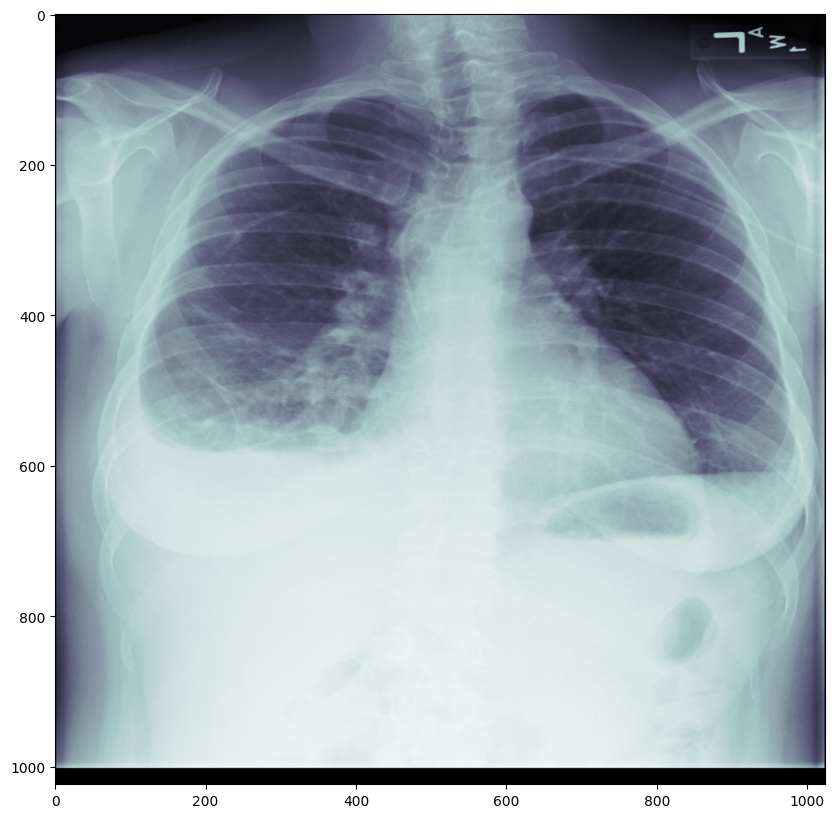

In [8]:
show_dcm_info(dcm_img)
plot_pixel_array(dcm_img)

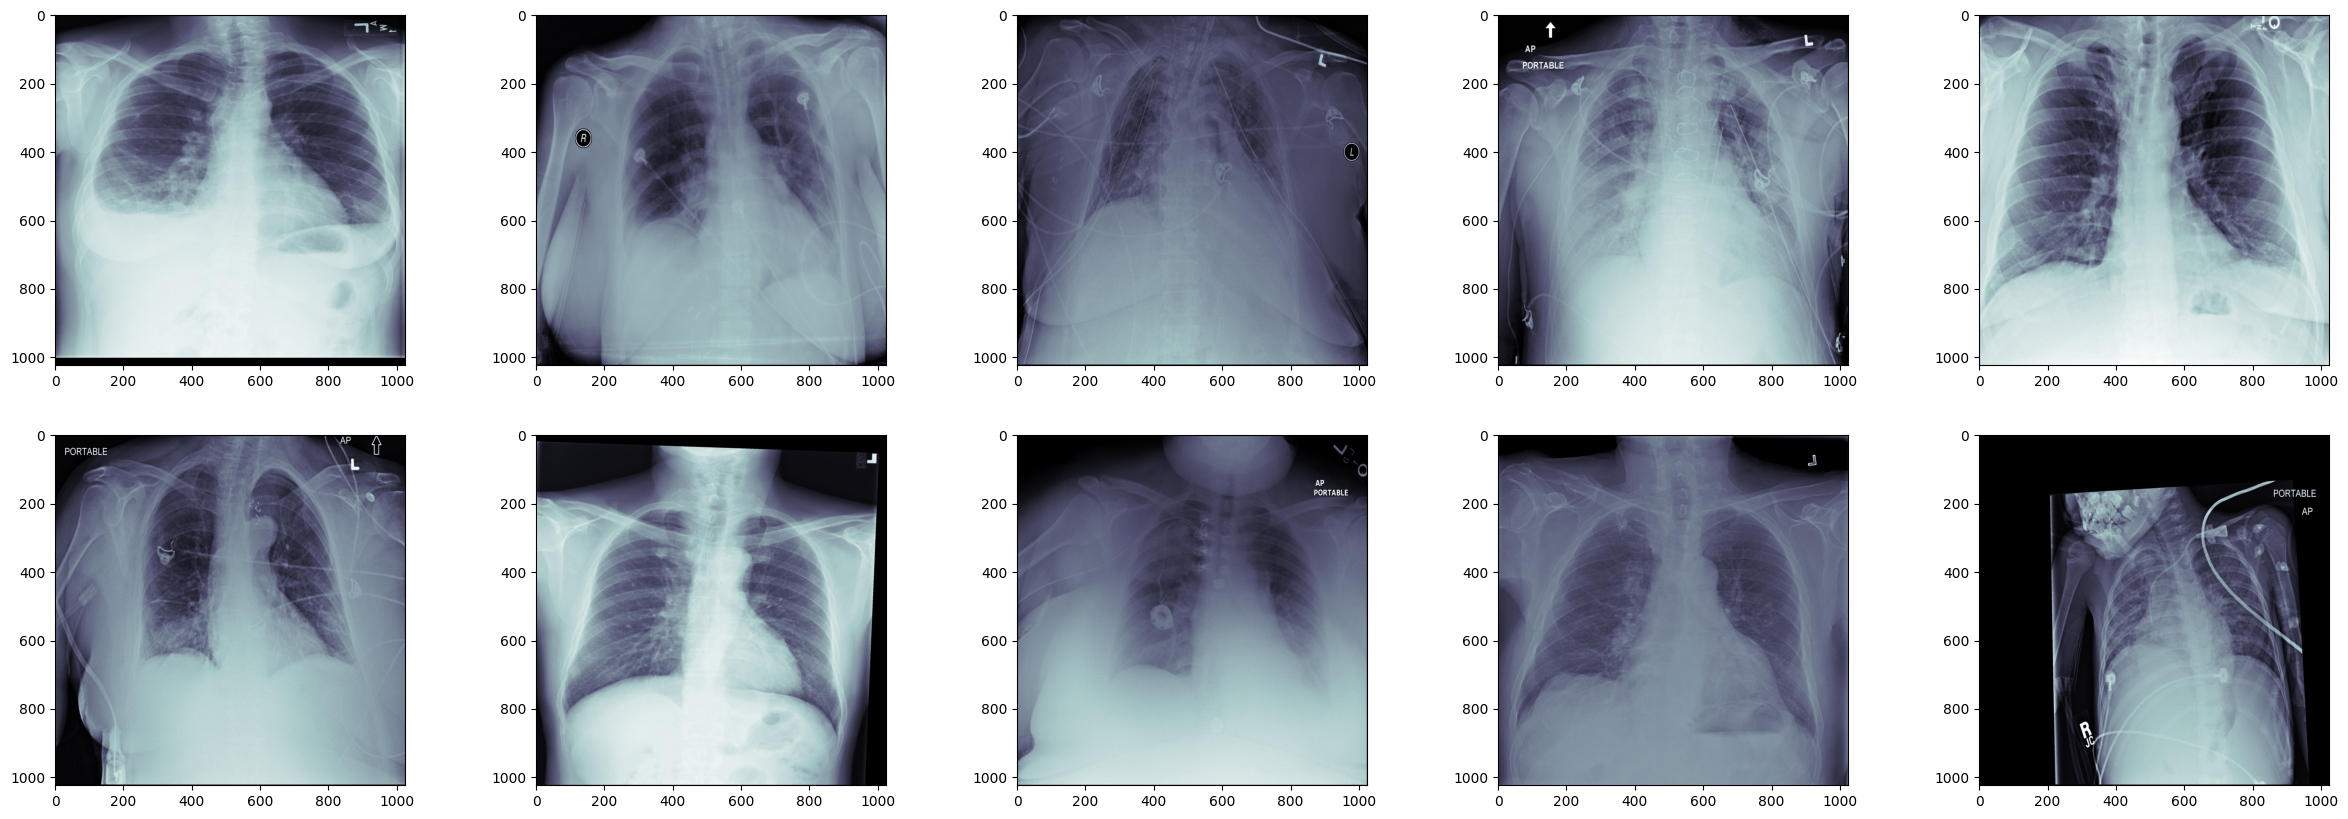

In [9]:
fig, axs = plt.subplots(2, 5, figsize=(30, 10))

for idx, ax in zip(range(10), axs.flatten()):
    dcm_img = pydicom.dcmread(dicom_img_list[idx])  #read_file에서 dcmread로 바뀜
    img = dcm_img.pixel_array
    ax.imshow(img, cmap='bone')

## 3차원 이미지 영상(brain image)

In [10]:
!pip install scikit-Image
!pip install natsort

In [11]:
from skimage.util import montage
from natsort import natsorted

In [12]:
BASE_PATH = Path('/content/drive/MyDrive/CH01, 03 실습.zip (Unzipped Files)/CH01_실습/Fastcampus/brain_images/00825/T2w')
dicom_images = natsorted(list(BASE_PATH.glob('*.dcm')))
print(f'number of dicom images : {len(dicom_images)}')

number of dicom images : 29


In [13]:
concat_images = np.array([pydicom.dcmread(i).pixel_array for i in dicom_images])

In [14]:
print(concat_images.shape)

(29, 512, 512)


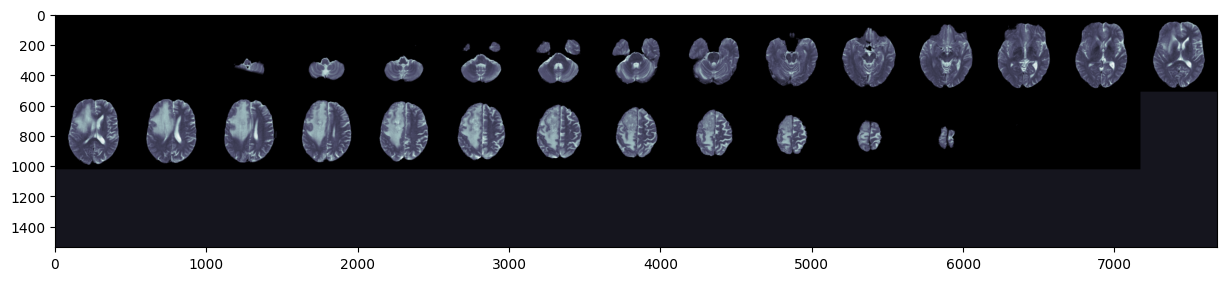

In [15]:
plt.figure(figsize=(15, 15))
plt.imshow(montage(concat_images, grid_shape=(3, 15)), cmap='bone')


In [16]:
#NIFTI 파일로 변경
!pip install nibabel
!pip install dicom2nifti

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 92.0 MB/s eta 0:00:00


In [17]:
import dicom2nifti
import nibabel as nib

#NIFTI로 변경
dicom2nifti.convert_directory('/content/drive/MyDrive/CH01, 03 실습.zip (Unzipped Files)/CH01_실습/Fastcampus/brain_images/00825/T2w', './')
nifti_path = './8_t2w.nii.gz'

In [18]:
sample_img = nib.load(nifti_path)
sample_img = np.asanyarray(sample_img.dataobj)

In [19]:
print(f'nifti file shape(height, width, depth) : {sample_img.shape}')

nifti file shape(height, width, depth) : (512, 512, 29)


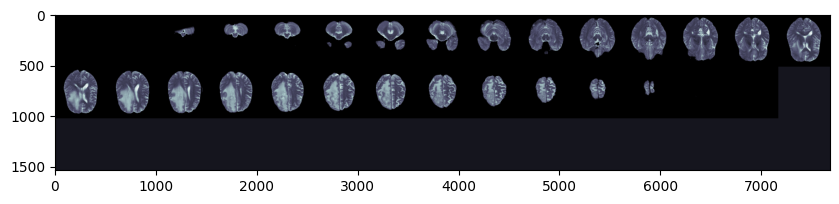

In [20]:
#dicom과 똑같은 이미지이지만 파일 하나로 관리를 할 수 있음
transpose_img = sample_img.transpose((2, 1, 0))
plt.figure(figsize=(10, 10))
plt.imshow(montage(transpose_img, grid_shape=(3, 15)), cmap='bone')

In [21]:
#NIFTI로 변경하는 코드
dicom2nifti.convert_directory('/content/drive/MyDrive/CH01, 03 실습.zip (Unzipped Files)/CH01_실습/Fastcampus/brain_images/00829/T2w', './')
nifti_path = './501_t2w.nii.gz'

In [22]:
#nifti 파일로 변환 후 파일 읽어오기
sample_img = nib.load(nifti_path)
sample_img = np.asanyarray(sample_img.dataobj)
print(f'nifti file shape(height, width, depth) : {sample_img.shape}')

transpose_img = sample_img.transpose((2, 1, 0))

nifti file shape(height, width, depth) : (640, 640, 27)


In [23]:
from IPython.display import Image as show_gif
import matplotlib.animation as anim

class ImageToGIF:
    def __init__(self,
                 size=(500, 500),
                 xy_text=(80, 300),
                 dpi=100,   #이미지화질
                 cmap='CMRmap'):  #bone으로 바꾸면 grayscale로 나옴

        self.fig = plt.figure()
        self.fig.set_size_inches(size[0] / dpi, size[1] / dpi)
        self.xy_text = xy_text
        self.cmap = cmap

        self.ax = self.fig.add_axes([0, 0, 1, 1])
        self.ax.set_xticks([])
        self.ax.set_yticks([])
        self.images = []

    def add(self, image, label, with_mask=False):
        plt.set_cmap(self.cmap)
        plt_img = self.ax.imshow(image, animated=True)
        plt_text = self.ax.text(*self.xy_text, label, color='red')
        to_plot = [plt_img, plt_text]
        self.images.append(to_plot)
        plt.close()

    def save(self, filename, fps):
        animation = anim.ArtistAnimation(self.fig, self.images)
        animation.save(filename, writer='imagemafick', fps=fps)


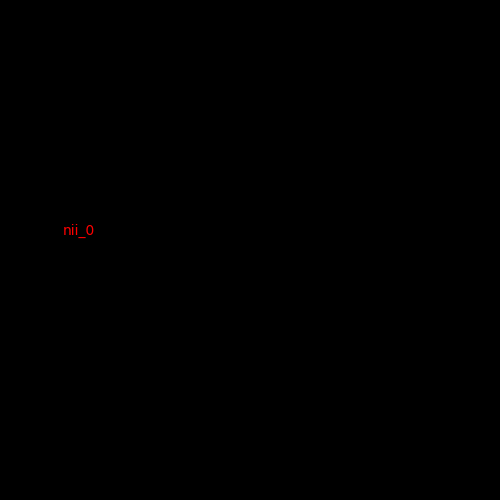

In [24]:
#Transverse plane
sample_data_gif = ImageToGIF()
label = nifti_path.replace('/', '.').split('.')[-2]
filename = f'{label}_3d_2d.gif'

for i in range(transpose_img.shape[0]):
    image = transpose_img[i]
    sample_data_gif.add(image, label=f'{label}_{str(i)}')

sample_data_gif.save(filename, fps=10)
show_gif(filename, format='png')


In [25]:
transpose_img.shape

(27, 640, 640)

In [ ]:
#sagittal plane으로 확인

import cv2

sample_data_gif = ImageToGIF()
label = nifti_path.replace('/', '.').split('.')[-2]
filename = f'{label}_3d_2d.gif'

for i in range(transpose_img.shape[2]):
    image = np.rot90(transpose_img[..., i], k=2, axes=(1, 0))
    image = cv2.resize(image, (720, 640))
    sample_data_gif.add(image, label=f'{label}_{str(i)}')

sample_data_gif.save(filename, fps=10)
show_gif(filename, format='png')